In [8]:
# Complete dataset - cess-esp

import nltk
from nltk import *
from nltk.tag import hmm


s_tagged = nltk.corpus.cess_esp.tagged_sents()

f_list = []
t_list = []
for sent in s_tagged:
    for word, tag in sent:
        f_list.append((word, tag))
    t_list.append(f_list)
    f_list = []
    
cut = int(0.9 * len(s_tagged))
training_data = s_tagged[:cut]
test_data = s_tagged[cut:]
text == training_data + test_data                      #True
print(len(training_data) / len(test_data))

9.0


In [12]:
portion = int(0.1 * len(t_list))

train1K = t_list[:portion]
train2K = t_list[portion:portion*2]
train3K = t_list[portion*2:portion*3]
train4K = t_list[portion*3:portion*4]
train5K = t_list[portion*4:portion*5]
train6K = t_list[portion*5:portion*6]
train7K = t_list[portion*6:portion*7]
train8K = t_list[portion*7:portion*8]
train9K = t_list[portion*8:portion*9]
train10K = t_list[portion*9:portion*10]

complete = train1K + train2K + train3K + train4K + train5K + train6K + train7K + train8K + train9K + train10K

In [13]:
from random import shuffle

shuffle(complete)

train_list = []
test_list = []
allof = []

def hmm(training_data, test_data):
    hmm_tagger = nltk.HiddenMarkovModelTagger.train(training_data)
    return hmm_tagger.evaluate(test_data)
    
for flag in range(10):
    for i in range(10):
        if i == flag:
            test_list = complete[portion*(i):portion*(i+1)]
        else:
            train_list.append(complete[portion*(i):portion*(i+1)])
    train_list = train_list[0] + train_list[1] + train_list[2] + train_list[3] + train_list[4] + train_list[5] + train_list[6] + train_list[7] + train_list[8]
    allof.append(hmm(train_list, test_list))
    train_list.clear()
    test_list.clear()

In [14]:
print("Complete dataset accuracy\n")
for i in allof:
    print(i)

Complete dataset accuracy

0.8929632285158251
0.899514687100894
0.9004863253673587
0.8972453222453223
0.894800803127972
0.8956846030900373
0.8975382904513977
0.8953549060542797
0.9006981348338022
0.8992212079013874


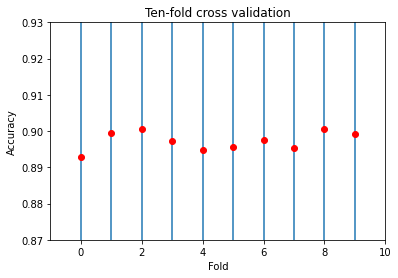

In [16]:
# Hidden Markov Model for complete data set
import matplotlib.pyplot as plt
x=[i for i in range(10)]
y=allof
plt.axis([-1, 10, 0.87, 0.93])
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.title('Ten-fold cross validation')
plt.plot(x,y,'ro')
plt.errorbar(x,y,yerr=allof,linestyle='None')
plt.show()